In [ ]:
!pip install wget

In [1]:
import pandas as pd
from settings import *
from scrape import *
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets
%matplotlib inline

In [2]:
scrapePage(anacUrl)

2019
2019-01.csv
Arquivo já foi baixado anteriormente.
2019-02.csv
Arquivo já foi baixado anteriormente.
2019-03.csv
Arquivo já foi baixado anteriormente.
2019-04.csv
Arquivo já foi baixado anteriormente.
2019-05.csv
Arquivo já foi baixado anteriormente.
2019-06.csv
Arquivo já foi baixado anteriormente.
2019-07.csv
Arquivo já foi baixado anteriormente.
2019-08.csv
Arquivo já foi baixado anteriormente.
2019-09.csv
Arquivo já foi baixado anteriormente.
2019-10.csv
Arquivo já foi baixado anteriormente.
2019-11.csv
Arquivo já foi baixado anteriormente.
2019-12.csv
Arquivo já foi baixado anteriormente.
2018
2018-01.csv
Arquivo já foi baixado anteriormente.
2018-02.csv
Arquivo já foi baixado anteriormente.
2018-03.csv
Arquivo já foi baixado anteriormente.
2018-04.csv
Arquivo já foi baixado anteriormente.
2018-05.csv
Arquivo já foi baixado anteriormente.
2018-06.csv
Arquivo já foi baixado anteriormente.
2018-07.csv
Arquivo já foi baixado anteriormente.
2018-08.csv
Arquivo já foi baixado anter

In [3]:
situacaoVoos = []
fileCsvFinal = pd.DataFrame()
for ano in range(2015, 2020):
    print(f"Lendo os arquivos do ano {ano}")
    for i in range(1, 13):
            sep = [';', ',','\t']
            sepIndex = 0
            while True:
                try:
                    fileCsv = pd.read_csv(
                        f'data/{ano}-{i:02}.csv', encoding='ISO-8859-1', sep=sep[sepIndex], low_memory=False)
                    if ('internet' in fileCsv.columns[0]):
                        fileCsv.columns = fileCsv.iloc[0]
                        fileCsv = fileCsv[1:]
                    if len(fileCsv.columns) <= 1:
                        raise ValueError('sepIndex')
                    else:
                        try:
                            fileCsv = fileCsv.drop(columns='Data Prevista')
                        except:
                            pass
                        fileCsv.columns = ['ICAO Empresa Aérea', 'Número Voo', 'Código DI', 'Código Tipo Linha',
                                        'ICAO Aeródromo Origem', 'ICAO Aeródromo Destino', 'Partida Prevista',
                                        'Partida Real', 'Chegada Prevista', 'Chegada Real', 'Situação Voo',
                                        'Código Justificativa']
                    
                    fileCsv = fileCsv.assign(Ano = ano)
                    fileCsv = fileCsv.assign(Mes = i)
                    
                    fileCsvFinal = pd.concat([fileCsvFinal, fileCsv])
                    print(len(fileCsvFinal))
                    break
                except Exception as e:
                    if e.args[0] == 'sepIndex':
                        if (sepIndex < 3):
                            sepIndex += 1
                    else:
                        print(e)
fileCsvFinal['Situação Voo'] = fileCsvFinal['Situação Voo'].str.upper()
fileCsvFinal['Situação Voo'] = fileCsvFinal['Situação Voo'].str.replace('NÃO REALIZADO', 'CANCELADO', regex=False)

Lendo os arquivos do ano 2015
114636
216629
327636
434556
542910
648608
760762
868806
976224
1085370
1189754
1301570
Lendo os arquivos do ano 2016
1415829
1517497
1619362
1718322
1810178
1898218
1990804
2082306
2168746
2258370
2345436
2440576
Lendo os arquivos do ano 2017
2539374
2624374
2716233
2802437
2893114
2980986
3077896
3172081
3261534
3355080
3446623
3546060
Lendo os arquivos do ano 2018
3649557
3739167
3829956
3909737
3993491
4073793
4164009
4248397
4329316
4412963
4492988
4580616
Lendo os arquivos do ano 2019
4672433
4751959
4835021
4912465
4989166
5063355
5149027
5229616
5310153
5394392
5475390
5563607


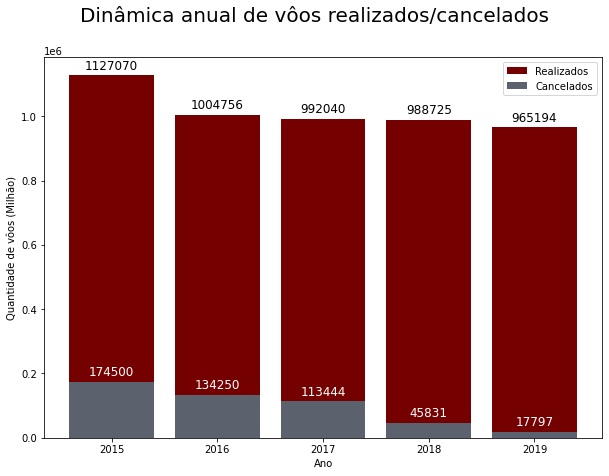

In [4]:
fig, ax = plt.subplots(figsize=(10,7))
fig.suptitle("Dinâmica anual de vôos realizados/cancelados", fontsize=20)
SituacaoPorAno = pd.DataFrame()
for situacao in fileCsvFinal['Situação Voo'].unique():
    df = fileCsvFinal.loc[fileCsvFinal['Situação Voo'] == situacao]
    df = df['Ano'].value_counts()
    SituacaoPorAno= pd.concat([SituacaoPorAno, df], axis=1)
SituacaoPorAno.columns = ['Realizado', 'Cancelado']
graphRealizados = plt.bar(SituacaoPorAno['Realizado'].index, SituacaoPorAno['Realizado'].values, color='#740000', label = 'Realizados')
graphCancelados = plt.bar(SituacaoPorAno['Cancelado'].index, SituacaoPorAno['Cancelado'].values, color='#5b616d', label = 'Cancelados')

def autolabel(graph, color):
  
    for rect in graph:
        valor = rect.get_height()
        ax.annotate(f'{valor}',
                    xy=(rect.get_x() + rect.get_width() / 2, valor),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    color=color,
                    fontsize=12)

plt.ylabel('Quantidade de vôos (Milhão)')
plt.xlabel('Ano')

plt.legend(handles=[graphRealizados, graphCancelados])

autolabel(graphRealizados, '#000')
autolabel(graphCancelados, '#FFF')

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
fig.suptitle("Dinâmica mensal acumulada de vôos realizados/cancelados", fontsize=20)
SituacaoPorMes = pd.DataFrame()
colors = ['#ff0000','#ffda00','#e76ec6','#03da00','#000','#e7bec6','#004000','#9abec6','#5b196e','#03da00','#03da00','#03da00']
color=plt.cm.Paired(np.arange(12))
# print(color)
for mes in range(1, 13):
    df = fileCsvFinal.loc[fileCsvFinal['Mes'] == mes]
    df = df['Situação Voo'].value_counts()
    SituacaoPorMes= pd.concat([SituacaoPorMes, df], axis=1)
SituacaoPorMes.columns = ['Janeiro','Fevereiro','Março','Abril','Maio', 'Junho','Julho', 'Agosto','Setembro','Outubro', 'Novembro', 'Dezembro']
# x = SituacaoPorMes.iloc[0].plot(kind='bar', ax=axs, width=0.8, color='#740000', label="Realizados")
x = plt.bar(SituacaoPorMes.iloc[0].index, SituacaoPorMes.iloc[0].values,  color='#740000', label = 'Realizados')
y = plt.bar(SituacaoPorMes.iloc[1].index, SituacaoPorMes.iloc[1].values,  color='#5b616d', label = 'Cancelados')
# SituacaoPorMes.iloc[1].plot(kind='bar', ax=axs, width=0.8, color="#5b616d", label="Cancelados")

plt.ylabel('Quantidade de vôos')
plt.xlabel('Mês')
plt.legend(handles=[graphRealizados, graphCancelados])
labels = ax.get_xticklabels()
        
for label in labels:
    label.set_rotation(45)
print(f"Realizados : {int(SituacaoPorMes.iloc[0].sum())}")
print(f"Cancelados : {int(SituacaoPorMes.iloc[1].sum())}")
autolabel(x, '#000')
autolabel(y, "#FFF")

In [5]:
colorPastel = plt.cm.Pastel1(np.arange(12))
# colorBlack

def autolabel(graph, color):
  
    for rect in graph:
        valor = rect.get_height()
        ax.annotate(f'{valor}',
                    xy=(rect.get_x() + rect.get_width() / 2, valor),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    color=color,
                    fontsize=12)
def f(ano):
    fig, ax = plt.subplots(figsize=(14, 7))
    fig.suptitle("Dinâmica mensal de vôos Realizados/Cancelados", fontsize=20)
    if(ano < 2015):
        df = fileCsvFinal
    else:
        df = fileCsvFinal.loc[fileCsvFinal['Ano'] == ano]
    SituacaoPorMes = pd.DataFrame()
    for mes in range(1, 13):
        df2 = df.loc[df['Mes'] == mes]
        df2 = df2['Situação Voo'].value_counts()
        SituacaoPorMes= pd.concat([SituacaoPorMes, df2], axis=1)
    SituacaoPorMes.columns = ['Janeiro','Fevereiro','Março','Abril','Maio', 'Junho','Julho', 'Agosto','Setembro','Outubro', 'Novembro', 'Dezembro']
    
    x = plt.bar(SituacaoPorMes.iloc[0].index, SituacaoPorMes.iloc[0].values,  color='#740000', label = 'Realizados')
    y = plt.bar(SituacaoPorMes.iloc[1].index, SituacaoPorMes.iloc[1].values,  color='#5b616d', label = 'Cancelados')
        
    plt.ylabel('Quantidade de vôos')
    plt.xlabel('Mês')
    plt.legend(handles=[graphRealizados, graphCancelados])

    labels = ax.get_xticklabels()
    for label in labels:
        label.set_rotation(45)
    print(f"Média de voos realizados : {np.around(int(SituacaoPorMes.iloc[0].mean()))}")
    print(f"Média de voos cancelados : {np.around(int(SituacaoPorMes.iloc[1].mean()))}")
    autolabel(x, '#000')
    autolabel(y, "#FFF")



interact(f, ano=widgets.IntSlider(min=2014,max=2019,step=1,value=2014))

interactive(children=(IntSlider(value=2014, description='ano', max=2019, min=2014), Output()), _dom_classes=('…

<function __main__.f(ano)>

## Participação das principais empresas no cenário aéreo brasileiro

In [12]:
explode = [0.05]
pieColors=['#ff0000', '#5b616d', '#7a3f7a', '#80a07a', '#c3867a', '#55e5e5']
def f(ano, mes, empresas):
    explode = [0.05]
    for i in range(empresas):
        explode.append(0)
    fig = plt.figure(figsize=(8,5))

    title = f"Participação das {empresas} empresas com maior número de voos"
    if (ano >= 2015) :
        voosPorAno = fileCsvFinal.loc[fileCsvFinal['Ano'] == ano]
        title += f" em {ano}"
    else:
        voosPorAno = fileCsvFinal
    voosRealizados = voosPorAno[voosPorAno['Situação Voo'] == 'REALIZADO']
    voosCancelados = voosPorAno[voosPorAno['Situação Voo'] == 'CANCELADO']
    if (mes >= 1 and mes <= 12):
        title += f" no mês {mes}"
        voosRealizados = voosRealizados.loc[voosRealizados['Mes'] == mes]['ICAO Empresa Aérea'].value_counts()
        voosCancelados = voosCancelados.loc[voosCancelados['Mes'] == mes]['ICAO Empresa Aérea'].value_counts()
    else:
        voosRealizados = voosRealizados['ICAO Empresa Aérea'].value_counts()
        voosCancelados = voosCancelados['ICAO Empresa Aérea'].value_counts()
    fig.suptitle('Participação das principais empresas no cenário aéreo brasileiro', fontsize=20)


    outrasEmpresas = voosRealizados[voosRealizados < voosRealizados[empresas - 1]]
    outrasEmpresasRealizadosDf = pd.Series({'Outros' : outrasEmpresas.sum()})
    voosRealizadosDF = pd.concat([voosRealizados[:empresas], outrasEmpresasRealizadosDf])

    outrasEmpresasCancelados = voosCancelados[voosCancelados < voosCancelados[empresas - 1]]
    outrasEmpresasCanceladosDf = pd.Series({'Outros' : outrasEmpresasCancelados.sum()})
    voosCanceladosDF = pd.concat([voosCancelados[:empresas], outrasEmpresasCanceladosDf])
    
    
    ax1 = plt.subplot2grid((1,2),(0,0))
    ax1.set_title("Realizado")
    plt.pie(voosRealizadosDF, autopct='%1.1f%%', explode=explode, shadow=True, labels=voosRealizadosDF.index, colors=pieColors)
    
    ax2 = plt.subplot2grid((1,2),(0,1))
    ax2.set_title("Cancelados")
    plt.pie(voosCanceladosDF, autopct='%1.1f%%', explode=explode, shadow=True, labels=voosCanceladosDF.index, colors=pieColors)
interact(f, ano=widgets.IntSlider(min=2014,max=2019,step=1,value=2014), mes=widgets.IntSlider(min=0,max=12,step=1,value=0), empresas=widgets.IntSlider(min=2,max=5,step=1,value=2))

interactive(children=(IntSlider(value=2014, description='ano', max=2019, min=2014), IntSlider(value=0, descrip…

<function __main__.f(ano, mes, empresas)>

In [11]:
def f(ano, mes):
    fig, ax = plt.subplots(figsize=(10,6))
    fig.suptitle("Tipos de vôos", fontsize=20)
    if (ano >= 2015) :
        linhas = fileCsvFinal.loc[fileCsvFinal['Ano'] == ano]
    else:
        linhas = fileCsvFinal
    if (mes >= 1 and mes <= 12):
        linhas = linhas.loc[linhas['Mes'] == mes]['Código Tipo Linha'].value_counts()
    else:
        linhas = linhas['Código Tipo Linha'].value_counts()
    tiposDeVoos = plt.bar(linhas.index[:], linhas.values[:], color='#7a3f7a')
    def autolabel(graph, color):
    
        for rect in graph:
            valor = rect.get_height()
            ax.annotate(f'{valor}',
                      xy=(rect.get_x() + rect.get_width() / 2, valor),
                      xytext=(0, 3),
                      textcoords="offset points",
                      ha='center', va='bottom',
                      color=color,
                      fontsize=12)
    autolabel(tiposDeVoos, '#000')
  # labels = ax.get_xticklabels()
  # for label in labels:
  #     label.set_rotation(45)
    print("N - Nacional\nR - Regional\nI = Internacional\nE - Especial\nG - Cargueiro Internacional\nC - Cargueiro\nL - Rede Postal\nH - Sub-Regional")
interact(f, ano=widgets.IntSlider(min=2014,max=2019,step=1,value=2015),mes=widgets.IntSlider(min=0,max=12,step=1,value=0))

interactive(children=(IntSlider(value=2015, description='ano', max=2019, min=2014), IntSlider(value=0, descrip…

<function __main__.f(ano, mes)>

In [8]:
def f(aeroportos, ano, mes):
    fig, axs = plt.subplots(nrows=1, figsize=(10, 5))
    fig.suptitle(f'Concentração dos {aeroportos} aeroportos com maior número de partida de vôos - 2015 a 2019', fontsize=20)
    voosRealizados = fileCsvFinal.loc[fileCsvFinal['Situação Voo'] == 'REALIZADO']
    
    if (ano >= 2015) :
        aeroportosComMaisVoos = voosRealizados.loc[voosRealizados['Ano'] == ano]
    else:
        aeroportosComMaisVoos = voosRealizados
    if (mes >= 1 and mes <= 12):
        aeroportosComMaisVoos = aeroportosComMaisVoos.loc[aeroportosComMaisVoos['Mes'] == mes]['ICAO Aeródromo Origem'].value_counts()
    else:
        aeroportosComMaisVoos = aeroportosComMaisVoos['ICAO Aeródromo Origem'].value_counts()
    
    aeroportosComMaisVoos[:aeroportos].plot(kind='bar')
    labels = ax.get_xticklabels()
    for label in labels:
        label.set_rotation(45)
interact(f, aeroportos=widgets.IntSlider(min=5,max=30,step=1,value=5), ano=widgets.IntSlider(min=2014,max=2019,step=1,value=2015),mes=widgets.IntSlider(min=0,max=12,step=1,value=0))

interactive(children=(IntSlider(value=5, description='aeroportos', max=30, min=5), IntSlider(value=2015, descr…

<function __main__.f(aeroportos, ano, mes)>

In [9]:
def f(aeroportos, ano, mes):
    fig, axs = plt.subplots(nrows=1, figsize=(10, 5))
    fig.suptitle(f'Concentração dos {aeroportos} aeroportos com maior número de chegada de vôos - 2015 a 2019', fontsize=20)
    voosRealizados = fileCsvFinal.loc[fileCsvFinal['Situação Voo'] == 'REALIZADO']
    
    if (ano >= 2015) :
        aeroportosComMaisVoos = voosRealizados.loc[voosRealizados['Ano'] == ano]
    else:
        aeroportosComMaisVoos = voosRealizados
    if (mes >= 1 and mes <= 12):
        aeroportosComMaisVoos = aeroportosComMaisVoos.loc[aeroportosComMaisVoos['Mes'] == mes]['ICAO Aeródromo Destino'].value_counts()
    else:
        aeroportosComMaisVoos = aeroportosComMaisVoos['ICAO Aeródromo Destino'].value_counts()
    
    aeroportosComMaisVoos[:aeroportos].plot(kind='bar')
    labels = ax.get_xticklabels()
    for label in labels:
        label.set_rotation(45)
interact(f, aeroportos=widgets.IntSlider(min=5,max=30,step=1,value=5), ano=widgets.IntSlider(min=2014,max=2019,step=1,value=2015),mes=widgets.IntSlider(min=0,max=12,step=1,value=0))

interactive(children=(IntSlider(value=5, description='aeroportos', max=30, min=5), IntSlider(value=2015, descr…

<function __main__.f(aeroportos, ano, mes)>